In [9]:
# Computational Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stat

# Visualisazition Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier

# Cross Validation Libraries
from sklearn.cross_validation import cross_val_score

# Evaluation Metric Libraries
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Data Imports
df = pd.read_csv("./Dataset/Classification/classification_diabetes.csv")

# First Insights
print("Columns: ",list(df.columns))
print("The dataset has {0} rows and {1} columns".format(len(df),len(df.columns)))

df.head()

Columns:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
The dataset has 768 rows and 9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- A glance at data makes it obvious that the value of fetures like 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' cant be 0. 
- The only possible explanation for 0's in these fields is that the values which are not availabe for those fields are represented as 0

- Lets replace them back with NaN and decide individually about clean the data

In [39]:
df_copy = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
df_copy.replace(0,np.NaN,inplace=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy
df.head()

/tmp/ipykernel_16863/788463352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.replace(0,np.NaN,inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data Checks

In [44]:
# Data Checks 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [45]:
df.duplicated().sum()

0

In [46]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [47]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### EDA

In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

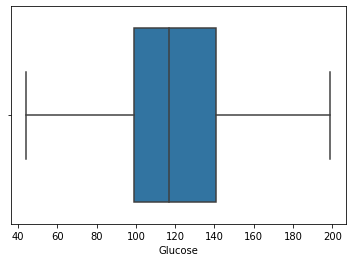

In [49]:
sns.boxplot(df['Glucose'])

<AxesSubplot:>

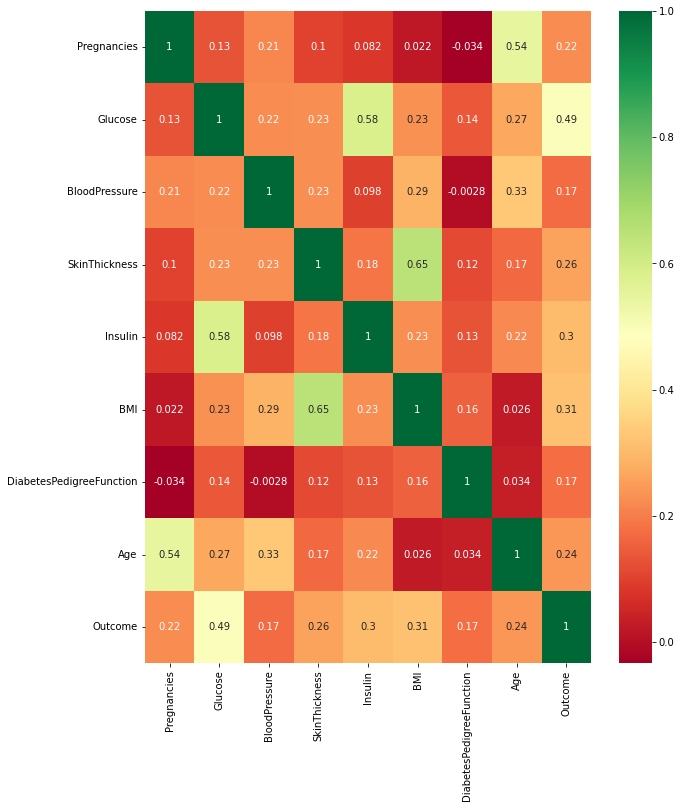

In [50]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')